In [45]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [34]:
def load_data(folder_path):
    images = []
    labels = []
    for label, category in enumerate(['cancer', 'non cancer']):
        category_folder = os.path.join(folder_path, category)
        for file_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, file_name)
            image = load_img(image_path, target_size=(128, 128))
            image = img_to_array(image)
            image = tf.image.random_flip_left_right(image)
            image = tf.image.random_flip_up_down(image)
            image = tf.image.random_brightness(image, max_delta=0.5)
            image = tf.image.random_contrast(image, lower=0.2, upper=1.8)
            image = tf.image.random_saturation(image, lower=0.2, upper=1.8)
            image = tf.image.random_hue(image, max_delta=0.2)
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)


In [35]:
def create_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01), input_shape=(128, 128, 3)),
        MaxPool2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        MaxPool2D((2, 2)),
        Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        MaxPool2D((2, 2)),
        BatchNormalization(),
        Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
        MaxPool2D((2, 2)),
        BatchNormalization(),
        Dropout(0.4),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], 
                  optimizer=Adam(learning_rate=0.0001))
    return model

In [36]:
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [37]:
# Main execution
folder_path = "C:/Users/Sameer/Oral cancer/OC" #https://www.kaggle.com/code/zaidpy/oral-approach/input
images, labels = load_data(folder_path)
images = images / 255.0
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle=True)


In [38]:
model = create_model()
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
24/24 [==============================] - 19s 721ms/step - loss: 6.8822 - accuracy: 0.6277 - precision_17: 0.6135 - recall_17: 0.6236 - val_loss: 6.5131 - val_accuracy: 0.5266 - val_precision_17: 0.4795 - val_recall_17: 0.4070
Epoch 2/20
24/24 [==============================] - 19s 803ms/step - loss: 6.3473 - accuracy: 0.7500 - precision_17: 0.7472 - recall_17: 0.7308 - val_loss: 6.3150 - val_accuracy: 0.5426 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 3/20
24/24 [==============================] - 19s 786ms/step - loss: 5.9120 - accuracy: 0.8324 - precision_17: 0.8400 - recall_17: 0.8077 - val_loss: 6.1535 - val_accuracy: 0.5426 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 4/20
24/24 [==============================] - 20s 846ms/step - loss: 5.7740 - accuracy: 0.8418 - precision_17: 0.8338 - recall_17: 0.8407 - val_loss: 5.9563 - val_accuracy: 0.5426 - val_precision_17: 0.0000e+00 - val_recall_17: 0.0000e+00
Epoch 5/20
24/24 [==========

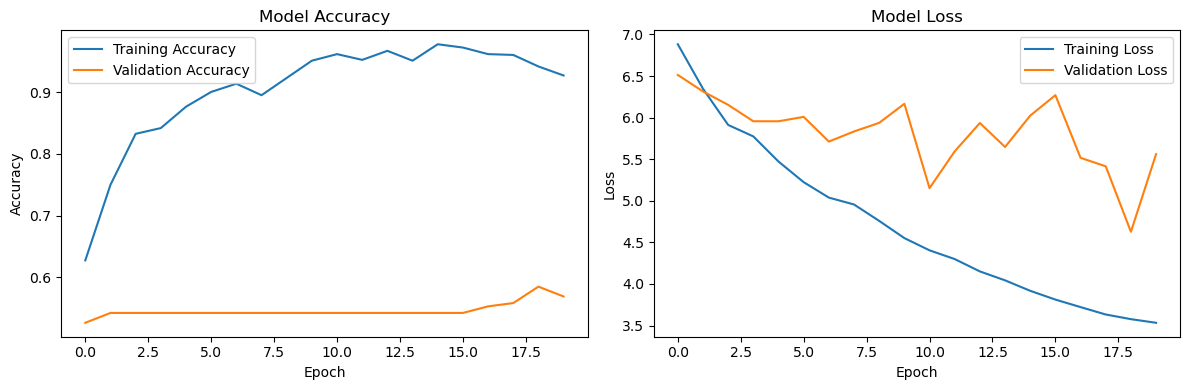

In [39]:
plot_history(history)

Training with learning rate: 0.001, batch size: 32
Epoch 1/10
24/24 [==============================] - 21s 800ms/step - loss: 12.1831 - accuracy: 0.5359 - precision_11: 0.5200 - recall_11: 0.5357 - val_loss: 7.1185 - val_accuracy: 0.5851 - val_precision_11: 0.5690 - val_recall_11: 0.3837
Epoch 2/10
24/24 [==============================] - 19s 780ms/step - loss: 8.6332 - accuracy: 0.6383 - precision_11: 0.6271 - recall_11: 0.6236 - val_loss: 13.6379 - val_accuracy: 0.4521 - val_precision_11: 0.4541 - val_recall_11: 0.9767
Epoch 3/10
24/24 [==============================] - 20s 842ms/step - loss: 6.3069 - accuracy: 0.7154 - precision_11: 0.7016 - recall_11: 0.7170 - val_loss: 13.3717 - val_accuracy: 0.4734 - val_precision_11: 0.4641 - val_recall_11: 0.9767
Epoch 4/10
24/24 [==============================] - 19s 800ms/step - loss: 5.5199 - accuracy: 0.7168 - precision_11: 0.7068 - recall_11: 0.7088 - val_loss: 4.4744 - val_accuracy: 0.5798 - val_precision_11: 0.5259 - val_recall_11: 0.825

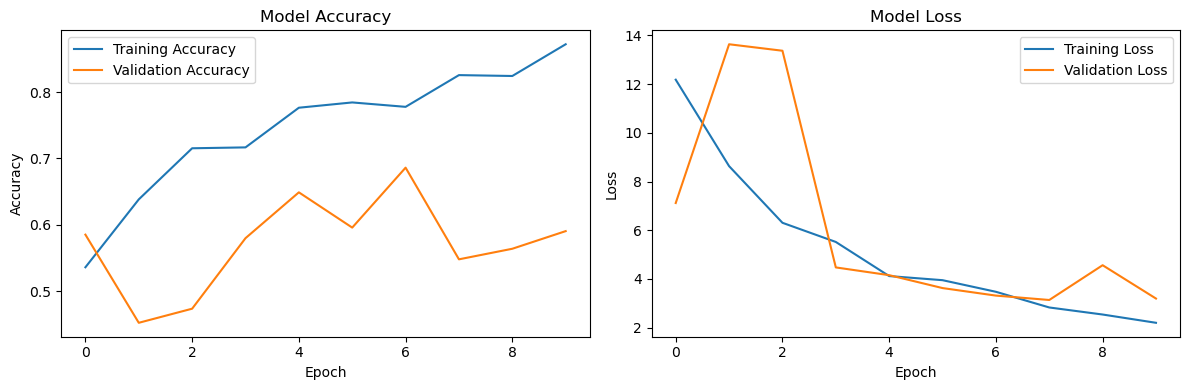

Training with learning rate: 0.001, batch size: 64
Epoch 1/10
12/12 [==============================] - 22s 2s/step - loss: 11.4640 - accuracy: 0.5691 - precision_13: 0.5565 - recall_13: 0.5412 - val_loss: 7.0717 - val_accuracy: 0.4840 - val_precision_13: 0.4689 - val_recall_13: 0.9651
Epoch 2/10
12/12 [==============================] - 18s 2s/step - loss: 7.9647 - accuracy: 0.6410 - precision_13: 0.6270 - recall_13: 0.6374 - val_loss: 8.7871 - val_accuracy: 0.4787 - val_precision_13: 0.4670 - val_recall_13: 0.9884
Epoch 3/10
12/12 [==============================] - 17s 1s/step - loss: 6.8813 - accuracy: 0.6755 - precision_13: 0.6478 - recall_13: 0.7225 - val_loss: 5.9173 - val_accuracy: 0.5798 - val_precision_13: 0.5402 - val_recall_13: 0.5465
Epoch 4/10
 4/12 [=========>....................] - ETA: 11s - loss: 5.8003 - accuracy: 0.7461 - precision_13: 0.7789 - recall_13: 0.6271

KeyboardInterrupt: 

In [16]:
learning_rates = [ 1e-3, 1e-2]
batch_sizes = [32, 64]

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate: {lr}, batch size: {batch_size}")
        model = create_model()
        model.compile(loss='binary_crossentropy', 
                      metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], 
                      optimizer=Adam(learning_rate=lr))
        
        history = model.fit(
            x=X_train,
            y=y_train,
            epochs=10,
            batch_size=batch_size,
            validation_data=(X_test, y_test)
        )
        
        plot_history(history)

In [40]:
#Reduce no of Layers and no of neurons
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], optimizer='adam')
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=20,
    validation_data=(X_test, y_test)
)

Epoch 1/20
24/24 [==============================] - 7s 180ms/step - loss: 2.1521 - accuracy: 0.5532 - precision_18: 0.5405 - recall_18: 0.5137 - val_loss: 1.7358 - val_accuracy: 0.5372 - val_precision_18: 0.4000 - val_recall_18: 0.0233
Epoch 2/20
24/24 [==============================] - 4s 188ms/step - loss: 1.5314 - accuracy: 0.7021 - precision_18: 0.7188 - recall_18: 0.6319 - val_loss: 1.5400 - val_accuracy: 0.5638 - val_precision_18: 1.0000 - val_recall_18: 0.0465
Epoch 3/20
24/24 [==============================] - 5s 185ms/step - loss: 1.2508 - accuracy: 0.7620 - precision_18: 0.7467 - recall_18: 0.7692 - val_loss: 1.3981 - val_accuracy: 0.5479 - val_precision_18: 0.6667 - val_recall_18: 0.0233
Epoch 4/20
24/24 [==============================] - 4s 168ms/step - loss: 1.0933 - accuracy: 0.7779 - precision_18: 0.7744 - recall_18: 0.7637 - val_loss: 1.3101 - val_accuracy: 0.5426 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00
Epoch 5/20
24/24 [==============================

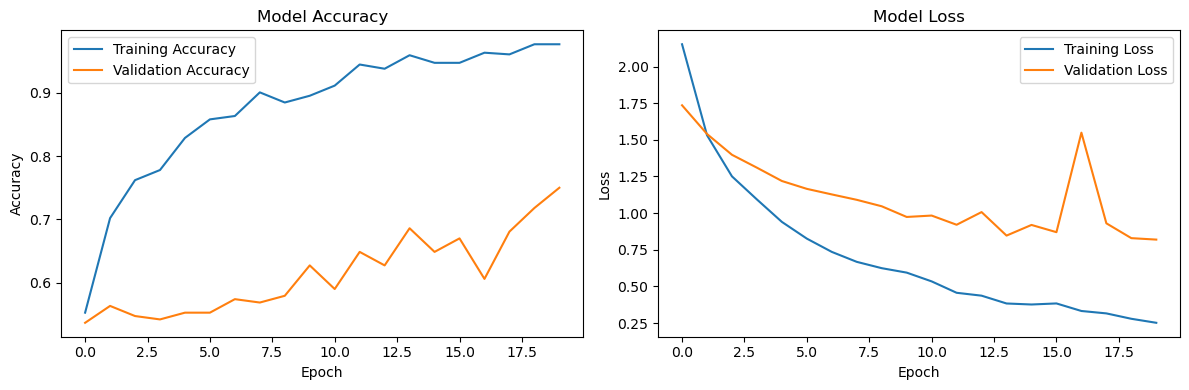

In [41]:
plot_history(history)

Epoch 1/20
24/24 [==============================] - 14s 199ms/step - loss: 4.8810 - accuracy: 0.5572 - precision_19: 0.5437 - recall_19: 0.5302 - val_loss: 1.9321 - val_accuracy: 0.4787 - val_precision_19: 0.4625 - val_recall_19: 0.8605
Epoch 2/20
24/24 [==============================] - 4s 184ms/step - loss: 1.8329 - accuracy: 0.6303 - precision_19: 0.6215 - recall_19: 0.6044 - val_loss: 1.7949 - val_accuracy: 0.5426 - val_precision_19: 0.0000e+00 - val_recall_19: 0.0000e+00
Epoch 3/20
24/24 [==============================] - 4s 176ms/step - loss: 1.6302 - accuracy: 0.6888 - precision_19: 0.6890 - recall_19: 0.6511 - val_loss: 1.6191 - val_accuracy: 0.5479 - val_precision_19: 1.0000 - val_recall_19: 0.0116
Epoch 4/20
24/24 [==============================] - 4s 183ms/step - loss: 1.4046 - accuracy: 0.7234 - precision_19: 0.7267 - recall_19: 0.6868 - val_loss: 1.4510 - val_accuracy: 0.6489 - val_precision_19: 0.8333 - val_recall_19: 0.2907
Epoch 5/20
24/24 [=============================

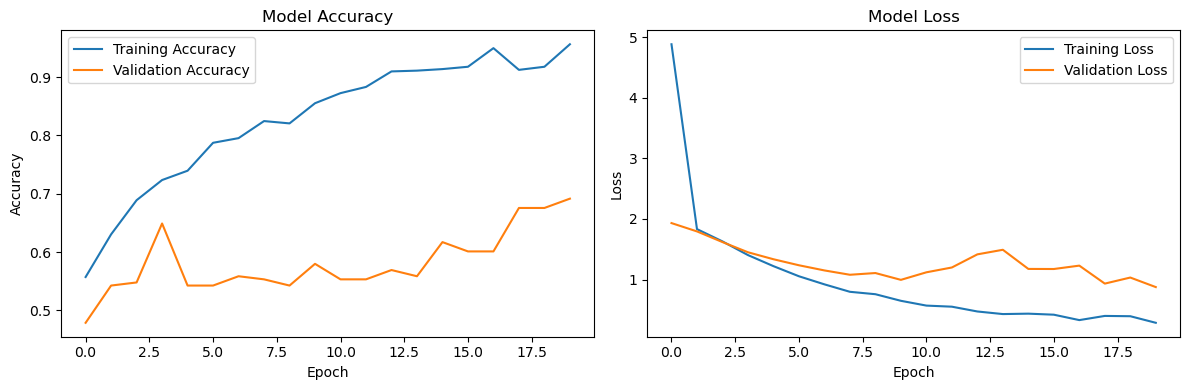

In [42]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import LeakyReLU

def create_model_1():
    model = Sequential([
        Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), input_shape=(128, 128, 3)),
        LeakyReLU(alpha=0.1),
        MaxPool2D((2, 2)),
        Conv2D(64, (3, 3), kernel_regularizer=l2(0.01)),
        LeakyReLU(alpha=0.1),
        MaxPool2D((2, 2)),
        Conv2D(128, (3, 3), kernel_regularizer=l2(0.01)),
        LeakyReLU(alpha=0.1),
        MaxPool2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(256),
        LeakyReLU(alpha=0.1),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], 
                  optimizer=RMSprop(learning_rate=0.001))
    return model

# Usage
model_1 = create_model_1()
history_1 = model_1.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
plot_history(history_1)

Epoch 1/20
24/24 [==============================] - 22s 796ms/step - loss: 8.7491 - accuracy: 0.5479 - precision_20: 0.5324 - recall_20: 0.5412 - val_loss: 8.2257 - val_accuracy: 0.4362 - val_precision_20: 0.4451 - val_recall_20: 0.9419
Epoch 2/20
24/24 [==============================] - 17s 720ms/step - loss: 11.4573 - accuracy: 0.5412 - precision_20: 0.5256 - recall_20: 0.5357 - val_loss: 64.5008 - val_accuracy: 0.4574 - val_precision_20: 0.4574 - val_recall_20: 1.0000
Epoch 3/20
24/24 [==============================] - 18s 746ms/step - loss: 16.0132 - accuracy: 0.5718 - precision_20: 0.5600 - recall_20: 0.5385 - val_loss: 102.1134 - val_accuracy: 0.5372 - val_precision_20: 0.0000e+00 - val_recall_20: 0.0000e+00
Epoch 4/20
24/24 [==============================] - 17s 725ms/step - loss: 42.2039 - accuracy: 0.5532 - precision_20: 0.5393 - recall_20: 0.5275 - val_loss: 7093.9189 - val_accuracy: 0.4574 - val_precision_20: 0.4574 - val_recall_20: 1.0000
Epoch 5/20
24/24 [=================

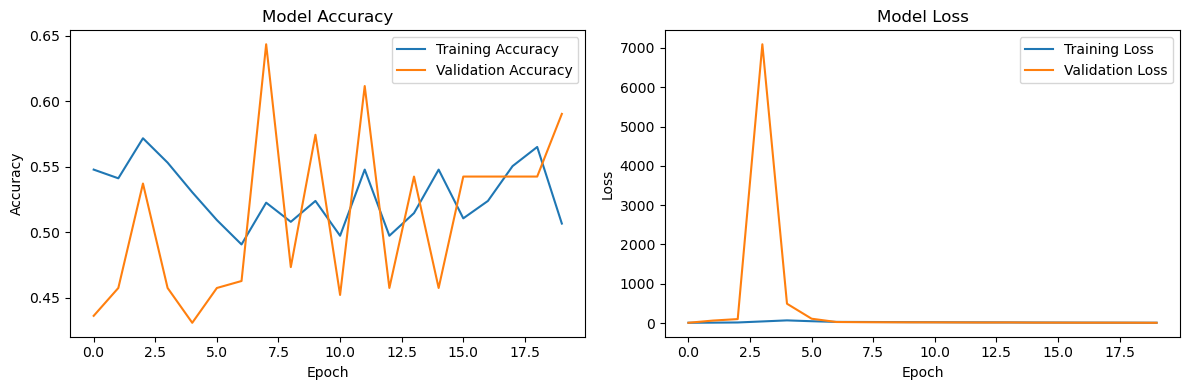

In [43]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import ELU

def create_model_2():
    model = Sequential([
        Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), input_shape=(128, 128, 3)),
        ELU(),
        MaxPool2D((2, 2)),
        Conv2D(128, (3, 3), kernel_regularizer=l2(0.01)),
        ELU(),
        MaxPool2D((2, 2)),
        Conv2D(256, (3, 3), kernel_regularizer=l2(0.01)),
        ELU(),
        MaxPool2D((2, 2)),
        BatchNormalization(),
        Conv2D(512, (3, 3), kernel_regularizer=l2(0.01)),
        ELU(),
        MaxPool2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(512),
        ELU(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], 
                  optimizer=SGD(learning_rate=0.01, momentum=0.9))
    return model

# Usage
model_2 = create_model_2()
history_2 = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
plot_history(history_2)

Epoch 1/20
24/24 [==============================] - 7s 217ms/step - loss: 11.4139 - accuracy: 0.5745 - precision_21: 0.5595 - recall_21: 0.5687 - val_loss: 5.9400 - val_accuracy: 0.6011 - val_precision_21: 0.7895 - val_recall_21: 0.1744
Epoch 2/20
24/24 [==============================] - 5s 195ms/step - loss: 6.8090 - accuracy: 0.6104 - precision_21: 0.5952 - recall_21: 0.6099 - val_loss: 8.1539 - val_accuracy: 0.4894 - val_precision_21: 0.4702 - val_recall_21: 0.9186
Epoch 3/20
24/24 [==============================] - 6s 232ms/step - loss: 6.2953 - accuracy: 0.6516 - precision_21: 0.6409 - recall_21: 0.6374 - val_loss: 24.0087 - val_accuracy: 0.5479 - val_precision_21: 0.6667 - val_recall_21: 0.0233
Epoch 4/20
24/24 [==============================] - 6s 246ms/step - loss: 4.7039 - accuracy: 0.6809 - precision_21: 0.6761 - recall_21: 0.6538 - val_loss: 4.0364 - val_accuracy: 0.5798 - val_precision_21: 0.5276 - val_recall_21: 0.7791
Epoch 5/20
24/24 [==============================] - 6s

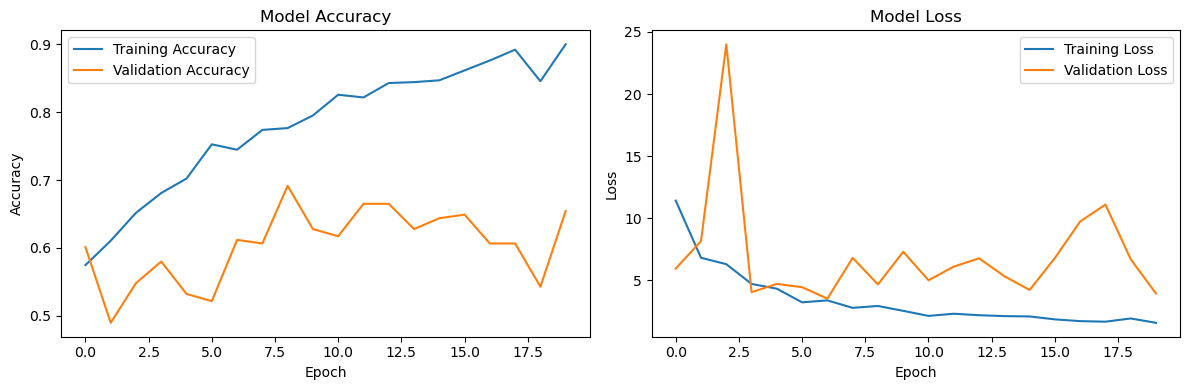

In [44]:
from tensorflow.keras.optimizers import Adamax

def create_model_3():
    model = Sequential([
        Conv2D(32, (3, 3), kernel_regularizer=l2(0.01), input_shape=(128, 128, 3), activation='selu'),
        MaxPool2D((2, 2)),
        Conv2D(64, (3, 3), kernel_regularizer=l2(0.01), activation='selu'),
        MaxPool2D((2, 2)),
        Conv2D(128, (3, 3), kernel_regularizer=l2(0.01), activation='selu'),
        MaxPool2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(256, activation='selu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', 
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()], 
                  optimizer=Adamax(learning_rate=0.002))
    return model

# Usage
model_3 = create_model_3()
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))
plot_history(history_3)

In [49]:
def create_vgg16_model(input_shape=(128, 128, 3), fine_tune=False):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = fine_tune
    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    # Combine base model and custom layers
    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    return model

# Load and preprocess data
folder_path = "C:/Users/Sameer/Oral cancer/OC"
images, labels = load_data(folder_path)
images = images / 255.0  #Normalization
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle=True)

In [50]:
vgg16_model = create_vgg16_model()
history = vgg16_model.fit(
    X_train,
    y_train,
    epochs=20,
    validation_data=(X_test, y_test),
    batch_size=32
)

Epoch 1/20
24/24 [==============================] - 47s 2s/step - loss: 0.6969 - accuracy: 0.5266 - precision_23: 0.5128 - recall_23: 0.4396 - val_loss: 0.6365 - val_accuracy: 0.7128 - val_precision_23: 0.6311 - val_recall_23: 0.8953
Epoch 2/20
24/24 [==============================] - 57s 2s/step - loss: 0.6372 - accuracy: 0.6556 - precision_23: 0.6596 - recall_23: 0.5962 - val_loss: 0.5863 - val_accuracy: 0.7287 - val_precision_23: 0.7333 - val_recall_23: 0.6395
Epoch 3/20
24/24 [==============================] - 39s 2s/step - loss: 0.5914 - accuracy: 0.6822 - precision_23: 0.6771 - recall_23: 0.6566 - val_loss: 0.5558 - val_accuracy: 0.7394 - val_precision_23: 0.7606 - val_recall_23: 0.6279
Epoch 4/20
24/24 [==============================] - 38s 2s/step - loss: 0.5491 - accuracy: 0.7553 - precision_23: 0.7632 - recall_23: 0.7170 - val_loss: 0.5392 - val_accuracy: 0.7128 - val_precision_23: 0.6818 - val_recall_23: 0.6977
Epoch 5/20
24/24 [==============================] - 38s 2s/step 

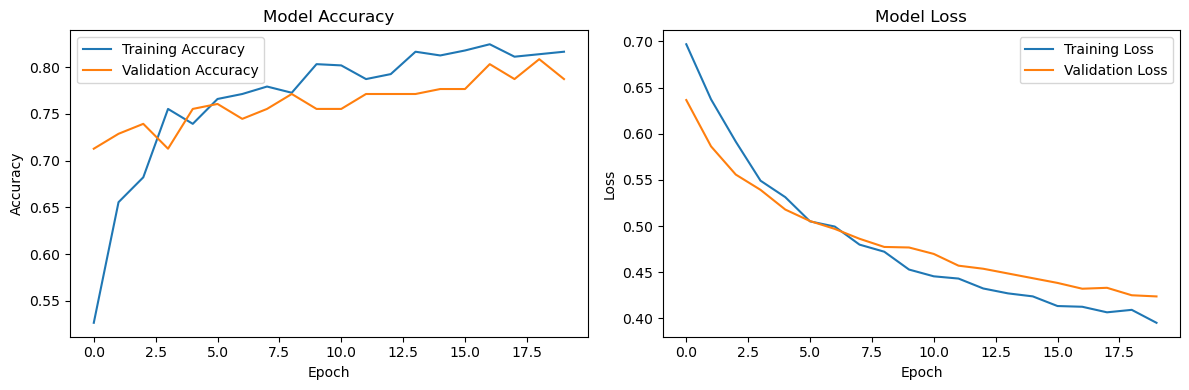

6/6 [==============================] - 5s 831ms/step - loss: 0.4238 - accuracy: 0.7872 - precision_23: 0.7674 - recall_23: 0.7674
Test accuracy: 0.7872
Test precision: 0.7674
Test recall: 0.7674


In [51]:
plot_history(history)

# Evaluate the model

test_loss, test_accuracy, test_precision, test_recall = vgg16_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test precision: {test_precision:.4f}")
print(f"Test recall: {test_recall:.4f}")